In [6]:
import collections
import matplotlib.pyplot as plt
import dill as pickle
import hickle
import numpy as np

class Protein(object):
    def __init__(self, name, key, go_terms):
        self.name = name
        self.key = key
        self.go_terms = go_terms
        self.features = collections.defaultdict(list)

    def amino_acid_count(self):
        return len(self.features.keys())


class Analysis(object):
    def __init__(self, go_term_to_proteins, protein_to_go_terms, proteins):
        self.go_term_to_proteins = go_term_to_proteins
        self.protein_to_go_terms = protein_to_go_terms
        self.proteins = proteins


    def number_of_go_terms_per_protein_per_domain(self, domain, protein, reduced_go_terms=None):
        if(reduced_go_terms == None):
            return len(self.protein_to_go_terms[protein.name][domain])

    def number_of_go_terms_per_protein(self, protein, reduced_go_terms=None):
        return sum([self.number_of_go_terms_per_protein_per_domain(domain, protein) for domain in ['molecular_function', 'biological_process', 'molecular_function']])

    def number_of_proteins_per_go_term(self, go_term):
        domains = ['molecular_function', 'biological_process', 'cellular_component']
        return sum([len(self.go_term_to_proteins[domain][go_term]) for domain in domains])

    def number_of_go_terms_per_domain(self, domain):
        return len(self.go_term_to_proteins[domain])

    def number_of_go_terms(self):
        return sum([self.number_of_go_terms_per_domain(domain) for domain in ['molecular_function', 'biological_process', 'cellular_component']])

    # Fix this
    def number_of_proteins_per_domain(self, domain, reduced_go_terms=None):
        if reduced_go_terms == None:
            go_terms = self.go_term_to_proteins[domain].keys()
        else:
            go_terms = reduced_go_terms[domain]

        return [len(self.go_term_to_proteins[domain][go_term]) for go_term in go_terms]

    def number_of_proteins_in_go_terms(self):
        go_term_to_protein_amount = dict()
        go_terms = self.go_term_to_proteins.keys()
        for go_term in go_terms:
            go_term_to_protein_amount[go_term] = self.number_of_proteins(go_term)

        return go_term_to_protein_amount


In [7]:
with open('./cached_material/all_proteins.pkl', 'rb') as f:
    proteins = pickle.load(f)

In [8]:
def create_mappings(proteins):
    protein_to_go_terms = collections.defaultdict(lambda: collections.defaultdict(list))
    go_term_to_proteins = collections.defaultdict(lambda: collections.defaultdict(list))

    domains = ['molecular_function', 'biological_process', 'cellular_component']

    for domain in domains:
        for protein in proteins[domain]:
            for go_term in protein.go_terms[domain]:
                protein_to_go_terms[protein.name][domain].append(go_term)

                go_term_to_proteins[domain][go_term].append(protein.name)

    return protein_to_go_terms, go_term_to_proteins

In [9]:
protein_to_go_terms, go_term_to_proteins = create_mappings(proteins)

In [10]:
analysis = Analysis(go_term_to_proteins, protein_to_go_terms, proteins)

In [11]:
all_proteins = []

for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    for protein in proteins[domain]:
        all_proteins.append(protein)

all_proteins = set(all_proteins)

#### Number of proteins

In [12]:
# Number of proteins
print("Number of proteins: %d" % len(all_proteins))

# Number of proteins per domain
for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    print("Number of proteins (%s): %d" % (domain, len(proteins[domain])))

Number of proteins: 23095
Number of proteins (molecular_function): 17964
Number of proteins (biological_process): 19258
Number of proteins (cellular_component): 18435


#### Number of GO terms

In [13]:
# Number of GO terms in total
print("Number of GO terms: %d" % analysis.number_of_go_terms())

for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    print("Number of GO terms (%s): %d" % (domain, analysis.number_of_go_terms_per_domain(domain)))

Number of GO terms: 999
Number of GO terms (molecular_function): 158
Number of GO terms (biological_process): 723
Number of GO terms (cellular_component): 118


In [14]:
number_of_go_terms_per_protein = [analysis.number_of_go_terms_per_protein(protein) for protein in all_proteins]

print("Average number of GO terms assigned to each protein: %d" % np.mean(number_of_go_terms_per_protein))

for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    number_of_go_terms_per_protein_per_domain = [analysis.number_of_go_terms_per_protein_per_domain(domain, protein) for protein in all_proteins]
    print("Average number of GO terms assigned to each protein (%s): %d" % (domain, np.mean(number_of_go_terms_per_protein_per_domain)))


Average number of GO terms assigned to each protein: 30
Average number of GO terms assigned to each protein (molecular_function): 5
Average number of GO terms assigned to each protein (biological_process): 20
Average number of GO terms assigned to each protein (cellular_component): 5


<IPython.core.display.Javascript object>


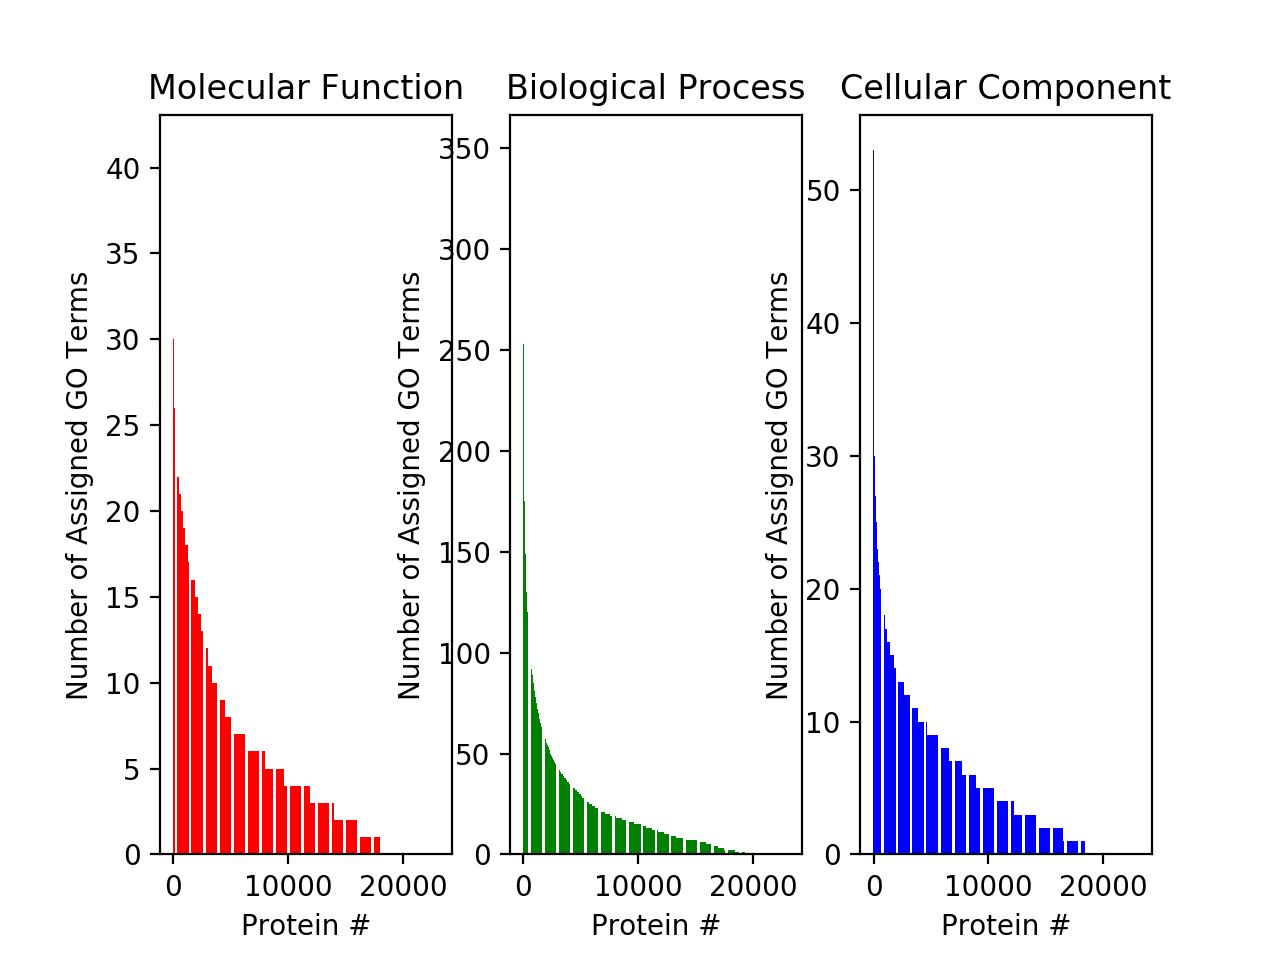

In [15]:
%matplotlib nbagg

fig, ax = plt.subplots(1, 3)
colors = ['r', 'g', 'b']

for index, domain in enumerate(['molecular_function', 'biological_process', 'cellular_component']):
    number_of_go_terms_per_protein_per_domain = [analysis.number_of_go_terms_per_protein_per_domain(domain, protein) for protein in all_proteins]
    
    sorted_list = sorted(number_of_go_terms_per_protein_per_domain, reverse=True)
    
    ax[index].bar(range(len(number_of_go_terms_per_protein_per_domain)), sorted_list, color = colors[index])

ax[0].set_title("Molecular Function")
ax[1].set_title("Biological Process")
ax[2].set_title("Cellular Component")

ax[0].set_xlabel('Protein #')
ax[1].set_xlabel('Protein #')
ax[2].set_xlabel('Protein #')

ax[0].set_ylabel('Number of Assigned GO Terms')
ax[1].set_ylabel('Number of Assigned GO Terms')
ax[2].set_ylabel('Number of Assigned GO Terms')

plt.show()

In [16]:
with open('./cached_material/reduced_proteins.pkl', 'rb') as f:
    proteins = pickle.load(f)

In [17]:
protein_to_go_terms, go_term_to_proteins = create_mappings(proteins)

In [18]:
analysis = Analysis(go_term_to_proteins, protein_to_go_terms, proteins)

In [19]:
all_proteins = []

for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    for protein in proteins[domain]:
        all_proteins.append(protein)

all_proteins = set(all_proteins)

In [20]:
# Number of proteins
print("Number of proteins: %d" % len(all_proteins))

# Number of proteins per domain
for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    print("Number of proteins (%s): %d" % (domain, len(proteins[domain])))

Number of proteins: 20541
Number of proteins (molecular_function): 13146
Number of proteins (biological_process): 15449
Number of proteins (cellular_component): 16276


In [21]:
# Number of GO terms in total
print("Number of GO terms: %d" % analysis.number_of_go_terms())

for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    print("Number of GO terms (%s): %d" % (domain, analysis.number_of_go_terms_per_domain(domain)))

Number of GO terms: 540
Number of GO terms (molecular_function): 77
Number of GO terms (biological_process): 381
Number of GO terms (cellular_component): 82


In [22]:
number_of_go_terms_per_protein = [analysis.number_of_go_terms_per_protein(protein) for protein in all_proteins]

print("Average number of GO terms assigned to each protein: %d" % np.mean(number_of_go_terms_per_protein))

for domain in ['molecular_function', 'biological_process', 'cellular_component']:
    number_of_go_terms_per_protein_per_domain = [analysis.number_of_go_terms_per_protein_per_domain(domain, protein) for protein in all_proteins]
    print("Average number of GO terms assigned to each protein (%s): %d" % (domain, np.mean(number_of_go_terms_per_protein_per_domain)))


Average number of GO terms assigned to each protein: 8
Average number of GO terms assigned to each protein (molecular_function): 1
Average number of GO terms assigned to each protein (biological_process): 5
Average number of GO terms assigned to each protein (cellular_component): 3


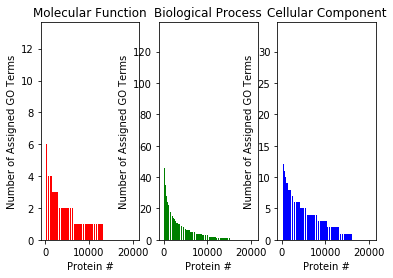

In [29]:
%matplotlib inline

fig, ax = plt.subplots(1, 3)
colors = ['r', 'g', 'b']

for index, domain in enumerate(['molecular_function', 'biological_process', 'cellular_component']):
    number_of_go_terms_per_protein_per_domain = [analysis.number_of_go_terms_per_protein_per_domain(domain, protein) for protein in all_proteins]
    
    sorted_list = sorted(number_of_go_terms_per_protein_per_domain, reverse=True)
    
    ax[index].bar(range(len(number_of_go_terms_per_protein_per_domain)), sorted_list, color = colors[index])

ax[0].set_title("Molecular Function")
ax[1].set_title("Biological Process")
ax[2].set_title("Cellular Component")

ax[0].set_xlabel('Protein #')
ax[1].set_xlabel('Protein #')
ax[2].set_xlabel('Protein #')

ax[0].set_ylabel('Number of Assigned GO Terms')
ax[1].set_ylabel('Number of Assigned GO Terms')
ax[2].set_ylabel('Number of Assigned GO Terms')

plt.show()

In [27]:
import os
import matplotlib.pyplot as plt
import numpy as np

directory = './data/full_terms_test/'

training_sets = []
testing_sets = []

go_term_sets = os.listdir(directory)[1:]
for go_term in go_term_sets:
    with open(directory + go_term, 'r') as f:
        lines = f.readlines()
        
        neg_set = lines[1]
        pos_set = lines[3]
        
        neg_test_proteins = int(neg_set.split(' ')[4][1:])
        neg_train_proteins = int(neg_set.split(' ')[-2][1:])
        
        pos_test_proteins = int(neg_set.split(' ')[4][1:])
        pos_train_proteins = int(neg_set.split(' ')[-2][1:])

        train_proteins = neg_train_proteins + pos_train_proteins
        test_proteins = neg_test_proteins + pos_test_proteins
        
        training_sets.append(train_proteins)
        testing_sets.append(test_proteins)

Average number of proteins in training sets: 3824
Average number of proteins in testing sets: 1637


<IPython.core.display.Javascript object>


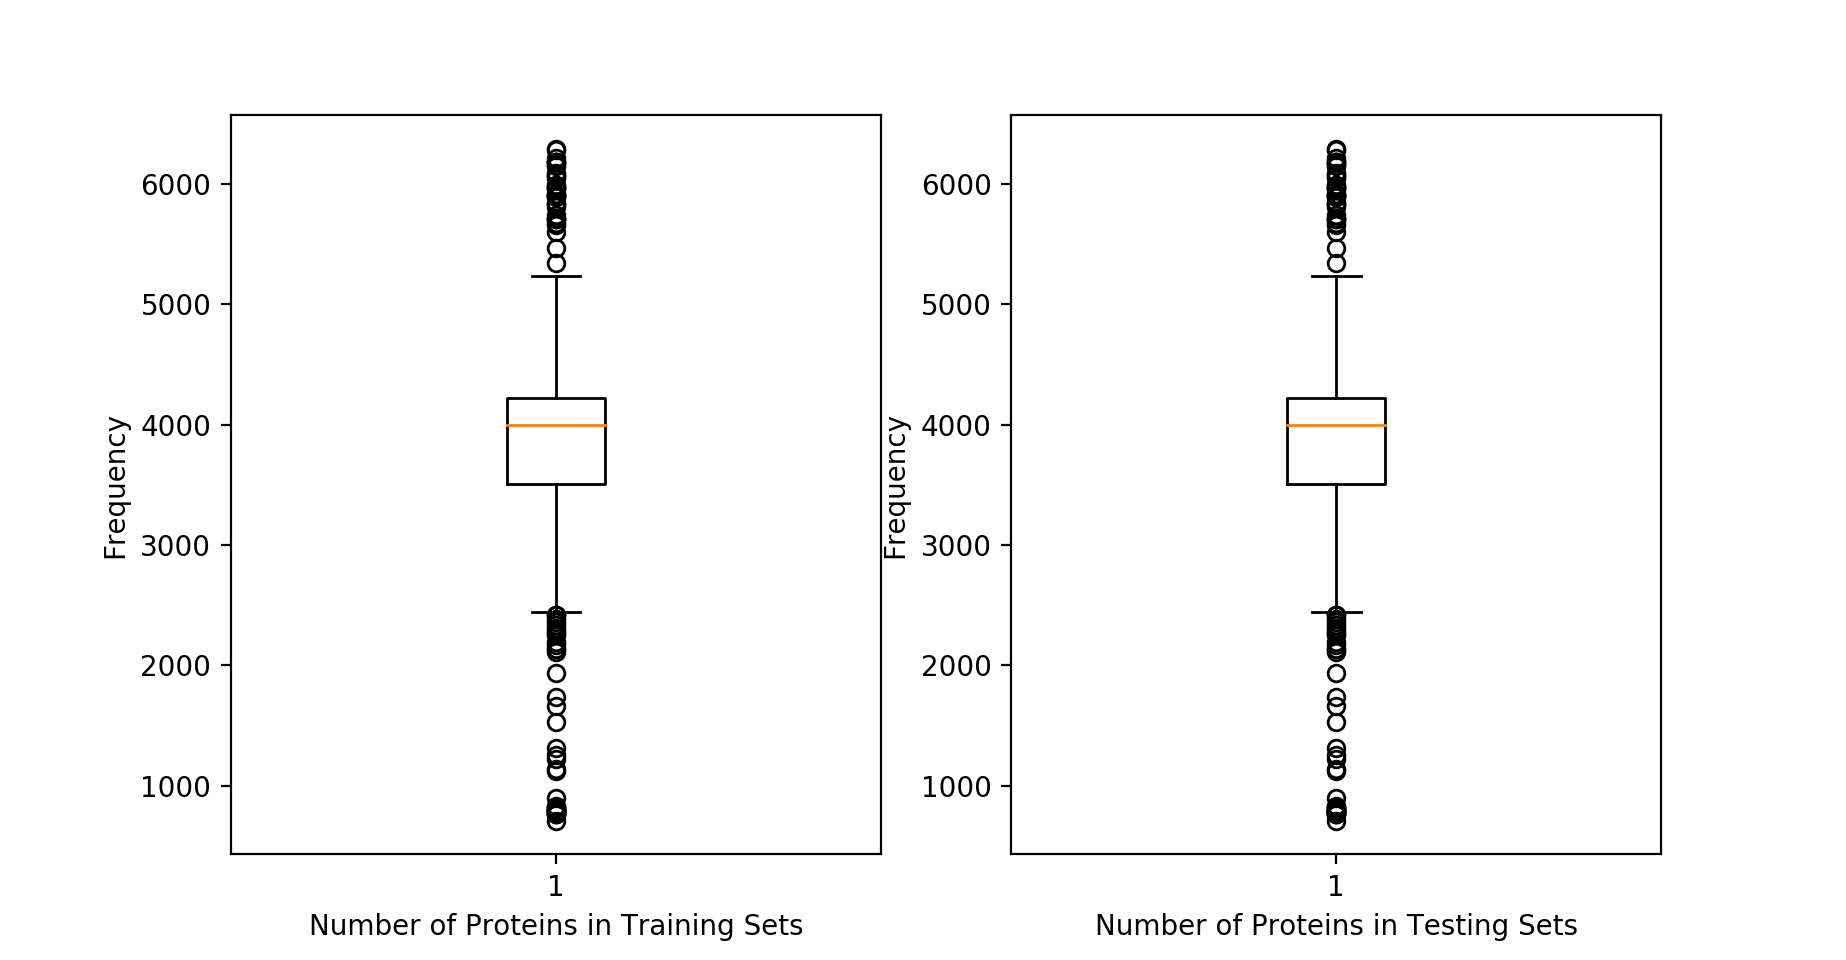

In [30]:
%matplotlib notebook

print("Average number of proteins in training sets: %d" % np.mean(training_sets))
print("Average number of proteins in testing sets: %d" % np.mean(testing_sets))

fig, ax = plt.subplots(1, 2)

ax[0].boxplot(training_sets)
ax[0].set_xlabel('Number of Proteins in Training Sets')
ax[0].set_ylabel('Frequency')

ax[1].boxplot(training_sets)
ax[1].set_xlabel('Number of Proteins in Testing Sets')
ax[1].set_ylabel('Frequency')
plt.show()